In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pytrends.request import TrendReq
import numpy as np

In [2]:
pytrends = TrendReq(hl='en-US', #language
                    tz=360) #timezone (US CST is 360)

In [3]:
def get_n():
    n = int(input('How many word would you like to search? '))
    return n

In [4]:
#Be careful, the scale is not for each keyword but overall
n = get_n()
kw_list = []
mids = []
for i in range(n):
    kw_list.append(input('word number ' + str(i+1) + ': '))
    print(pytrends.suggestions(kw_list[-1]))
    mids.append(input('Enter the mid you are interested in: '))

How many word would you like to search? 2
word number 1: Apple
[{'mid': '/m/0k8z', 'title': 'Apple', 'type': 'Technology company'}, {'mid': '/m/014j1m', 'title': 'Apple', 'type': 'Fruit'}, {'mid': '/g/11c1s04k8p', 'title': 'AirPods', 'type': 'Headphones'}, {'mid': '/m/027lnzs', 'title': 'iPhone', 'type': 'Mobile phone'}, {'mid': '/g/122z2s28', 'title': 'Apple', 'type': 'Plants'}]
Enter the mid you are interested in: /m/0k8z
word number 2: Facebook
[{'mid': '/m/02y1vz', 'title': 'Facebook', 'type': 'Social networking service'}, {'mid': '/m/0hmyfsv', 'title': 'Facebook, Inc.', 'type': 'Social media company'}, {'mid': '/m/0crj9_l', 'title': 'Face book', 'type': 'Topic'}, {'mid': '/g/11c5h24bx2', 'title': 'Facebook', 'type': 'Topic'}, {'mid': '/g/1q5bmrr0t', 'title': 'Facebook', 'type': 'Topic'}]
Enter the mid you are interested in: /m/02y1vz


In [5]:
data = pd.DataFrame()
for mid, kw in zip(mids, kw_list):
    pytrends.build_payload([mid], #up to 5 terms in the list
                           cat=0, #default to no category
                           timeframe='all', #Date to start from 
                           geo='', #two letter country abreviation (default to world)
                           gprop='') #what property to filter to (images, news, youtube or froogle 
                                     #(for Google Shopping results))
    tmp_data = pytrends.interest_over_time()
    tmp_data = tmp_data.iloc[:,:-1]
    tmp_data.columns = [kw]
    data = pd.concat([data,tmp_data], axis = 1)
data.head()

,Apple,Facebook
date,,
2004-01-01,19,0
2004-02-01,18,0
2004-03-01,17,0
2004-04-01,16,0
2004-05-01,16,0


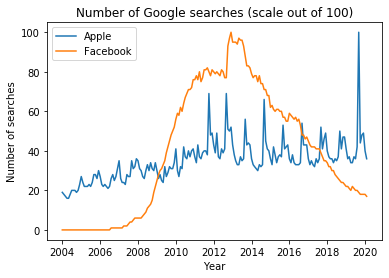

In [14]:
import matplotlib.pyplot as plt
for col in data.columns:
    plt.plot(data[col], label = col)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of searches')
plt.title('Number of Google searches (scale out of 100)')
plt.show()